# explore data

NO that the data has been extracted from the database and stored in a more convenient form I can start exploring it


In [1]:
import pandas as pd
import tiktoken
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load token counts

In [2]:
directory = './data/ncse_text_chunks'

df_list = []

for filename in os.listdir(directory):

    file_path = os.path.join(directory, filename)

    df = pd.read_parquet(file_path)

    df_list.append(df.loc[:, ['aid', 'article_type_id' ,'total_tokens', 'symbol_fract']])
    print(file_path)  # Or perform any file operation

df = pd.concat(df_list, ignore_index=True)

./data/ncse_text_chunks/ncse_base_1.parquet
./data/ncse_text_chunks/ncse_base_6.parquet
./data/ncse_text_chunks/ncse_base_0.parquet
./data/ncse_text_chunks/ncse_base_5.parquet
./data/ncse_text_chunks/ncse_base_2.parquet
./data/ncse_text_chunks/ncse_base_4.parquet
./data/ncse_text_chunks/ncse_base_3.parquet


In [3]:
df.describe()

,article_type_id,total_tokens,symbol_fract
count,667239.000000,667239.000000,662759.000000
mean,1.197572,621.443439,0.153016
std,0.405238,842.886900,0.133721
min,1.000000,0.000000,0.000000
25%,1.000000,43.000000,0.090659
50%,1.000000,254.000000,0.117949
75%,1.000000,825.000000,0.168775
max,3.000000,29344.000000,4.000000


# Article types

- 1: an article
- 2: and advert
- 3: picture

In [3]:
df.groupby('article_type_id').describe()

total_tokens                                             \
                       count        mean         std  min    25%    50%   
article_type_id                                                           
1                   537306.0  695.200951  903.607359  0.0   25.0  327.0   
2                   128038.0  321.120738  396.498207  0.0  109.0  186.0   
3                     1895.0    0.000000    0.000000  0.0    0.0    0.0   

                                symbol_fract                           \
                   75%      max        count      mean       std  min   
article_type_id                                                         
1                994.0  29344.0     535576.0  0.243487  0.174372  0.0   
2                339.0   9276.0     127183.0  0.248623  0.103939  0.0   
3                  0.0      0.0          0.0       NaN       NaN  NaN   

                                                         
                      25%       50%       75%       max  
article_type_id                                          
1                0.142708  0.181818  0.283759  4.800000  
2                0.189802  0.231076  0.279279  3.317647  
3                     NaN       NaN       NaN       NaN

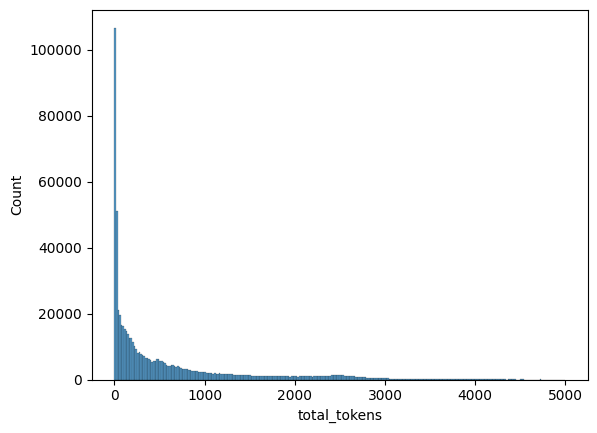

In [5]:
sns.histplot(data = df.loc[df['total_tokens']<5000], x = 'total_tokens')
plt.show()



In [9]:
df.loc[df['total_tokens']<500,'total_tokens'].sum()

58572343

In [26]:
import pandas as pd

# Assuming df is your original DataFrame and it already exists

# Initialize a list to hold the data for the new DataFrame
data = []

# Calculate the total count and total sum of 'total_tokens' for the entire dataset
total_count = df.shape[0]
total_tokens_sum = df['total_tokens'].sum()

# Loop through the range of values from 100 to 5000, inclusive, in increments of 100
for max_tokens in range(100, 5000, 100):
    # Filter the DataFrame for the current max_tokens threshold
    filtered_df = df[df['total_tokens'] < max_tokens]
    
    # Count the number of rows and sum the 'total_tokens' in the filtered DataFrame
    count = filtered_df.shape[0]
    total_tokens_sum_filtered = filtered_df['total_tokens'].sum()
    
    # Calculate fractions for the entire dataset
    fraction_of_articles = count / total_count
    fraction_of_tokens = total_tokens_sum_filtered / total_tokens_sum
    
    # Append the results to the data list
    data.append([count, max_tokens, total_tokens_sum_filtered, fraction_of_articles, fraction_of_tokens])

# Create a new DataFrame from the data list
result_df = pd.DataFrame(data, columns=['counts', 'token_limit', 'total_tokens_sum', 'fraction_of_articles', 'fraction_of_tokens'])



<Axes: xlabel='token_limit', ylabel='fraction_of_tokens'>

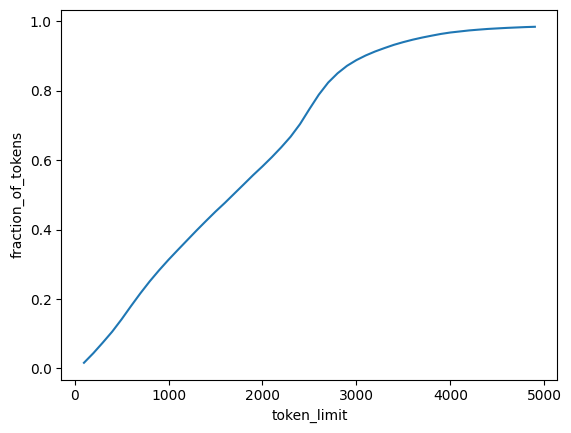

In [29]:
sns.lineplot(data = result_df , x  = 'token_limit', y = 'fraction_of_tokens')

In [6]:

# Initialize a list to hold the data for the new DataFrame
data = []

# Calculate the total counts and total tokens sums for each article type beforehand
total_counts_by_type = df.groupby('article_type_id')['total_tokens'].count()
total_tokens_sum_by_type = df.groupby('article_type_id')['total_tokens'].sum()

# Loop through the range of values from 100 to 5000, inclusive, in increments of 100
for max_tokens in range(100, 5000, 100):
    # Loop through each article type
    for article_type in df['article_type_id'].unique():
        # Filter the DataFrame for the current max_tokens and article_type
        filtered_df = df[(df['total_tokens'] < max_tokens) & (df['article_type_id'] == article_type)]
        
        # Count the number of rows and sum the 'total_tokens' in the filtered DataFrame
        count = filtered_df.shape[0]
        total_tokens_sum = filtered_df['total_tokens'].sum()
        
        # Calculate fractions
        fraction_of_articles = count / total_counts_by_type[article_type]
        fraction_of_tokens = total_tokens_sum / total_tokens_sum_by_type[article_type]
        
        # Append the results to the data list
        data.append([count, max_tokens, article_type, total_tokens_sum, fraction_of_articles, fraction_of_tokens])

# Create a new DataFrame from the data list
result_df = pd.DataFrame(data, columns=['counts', 'token_limit', 'article_type', 'total_tokens_sum', 'fraction_of_articles', 'fraction_of_tokens'])


/tmp/ipykernel_875748/2366460292.py:21: RuntimeWarning: invalid value encountered in scalar divide
  fraction_of_tokens = total_tokens_sum / total_tokens_sum_by_type[article_type]


<Axes: xlabel='token_limit', ylabel='fraction_of_articles'>

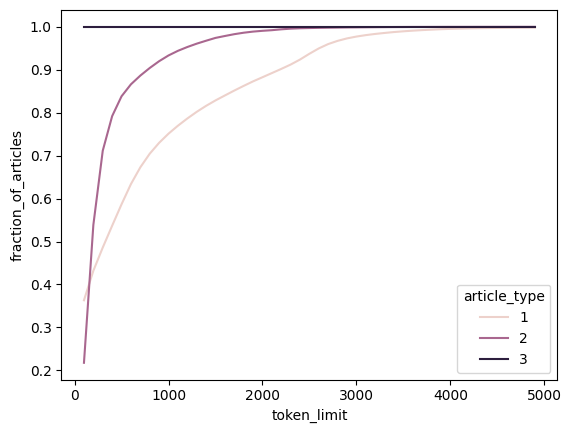

In [7]:
sns.lineplot(data = result_df , y  =  'fraction_of_articles', x = 'token_limit', hue = 'article_type')

In [7]:
result_df.loc[result_df['article_type']==1]

NameError: name 'result_df' is not defined

In [41]:
df.loc[(df['symbol_fract']<0.4) & (df['article_type_id']!=3)].groupby(['article_type_id']).describe()

total_tokens                                             \
                       count        mean         std  min    25%    50%   
article_type_id                                                           
1                   503218.0  729.667679  909.568710  1.0   25.0  381.0   
2                   124606.0  316.622643  386.619594  1.0  110.0  185.0   

                                  symbol_fract                           \
                     75%      max        count      mean       std  min   
article_type_id                                                           
1                1065.75  16380.0     503218.0  0.122737  0.075037  0.0   
2                 333.00   9276.0     124606.0  0.141847  0.055701  0.0   

                                                         
                      25%       50%       75%       max  
article_type_id                                          
1                0.084071  0.108434  0.149315  0.399950  
2                0.106339  0.131148  0.164815  0.399549

In [14]:

# Initialize a list to hold the data for the new DataFrame
data = []

# Calculate the total counts and total tokens sums for each article type beforehand
total_counts_by_type = df.groupby('article_type_id')['symbol_fract'].count()
total_tokens_sum_by_type = df.groupby('article_type_id')['symbol_fract'].sum()

# Loop through the range of values from 100 to 5000, inclusive, in increments of 100
for max_tokens in np.arange(0, 1, 0.01):
    # Loop through each article type
    for article_type in df['article_type_id'].unique():
        # Filter the DataFrame for the current max_tokens and article_type
        filtered_df = df[(df['symbol_fract'] < max_tokens) & (df['article_type_id'] == article_type)]
        
        # Count the number of rows and sum the 'total_tokens' in the filtered DataFrame
        count = filtered_df.shape[0]
        total_tokens_sum = filtered_df['total_tokens'].sum()
        
        # Calculate fractions
        fraction_of_articles = count / total_counts_by_type[article_type]
        fraction_of_tokens = total_tokens_sum / total_tokens_sum_by_type[article_type]
        
        # Append the results to the data list
        data.append([count, max_tokens, article_type, total_tokens_sum, fraction_of_articles, fraction_of_tokens])

# Create a new DataFrame from the data list
result_df = pd.DataFrame(data, columns=['counts', 'fraction_limit', 'article_type', 'total_tokens_sum', 'fraction_of_articles', 'fraction_of_tokens'])


/tmp/ipykernel_335514/618069027.py:20: RuntimeWarning: invalid value encountered in scalar divide
  fraction_of_articles = count / total_counts_by_type[article_type]
/tmp/ipykernel_335514/618069027.py:21: RuntimeWarning: invalid value encountered in scalar divide
  fraction_of_tokens = total_tokens_sum / total_tokens_sum_by_type[article_type]


In [19]:
result_df

,counts,fraction_limit,article_type,total_tokens_sum,fraction_of_articles,fraction_of_tokens
0,0,0.00,1,0,0.000000,0.000000
1,0,0.00,2,0,0.000000,0.000000
2,0,0.00,3,0,NaN,NaN
3,43620,0.01,1,398260,0.081445,4.946635
4,389,0.01,2,6001,0.003059,0.311929
...,...,...,...,...,...,...
295,127012,0.98,2,41028345,0.998655,2132.632329
296,0,0.98,3,0,NaN,NaN
297,534316,0.99,1,373425483,0.997647,4638.175413
298,127020,0.99,2,41033285,0.998718,2132.889107


<Axes: xlabel='fraction_limit', ylabel='fraction_of_articles'>

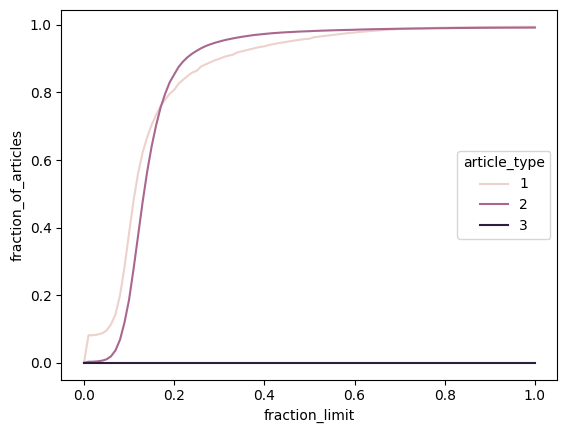

In [54]:
sns.lineplot(data = result_df , y  =  'fraction_of_articles', x = 'fraction_limit', hue = 'article_type')

In [35]:
# Initialize a list to hold the data for the new DataFrame
data = []

# Calculate the total counts and total tokens sums for each article type beforehand
total_counts_by_type = df.groupby('article_type_id')['total_tokens'].count()
total_tokens_sum_by_type = df.groupby('article_type_id')['total_tokens'].sum()

# Loop through the range of values from 0.01 to 1, inclusive, in increments of 0.01
for fraction_limit in np.arange(0.00, 1.01, 0.01):  # np.arange is used for float increments
    # Loop through each article type
    for article_type in df['article_type_id'].unique():
        # Filter the DataFrame for the current fraction_limit and article_type based on 'symbol_fract'
        filtered_df = df[(df['symbol_fract'] < fraction_limit) & (df['article_type_id'] == article_type)]
        
        # Count the number of rows and sum the 'total_tokens' in the filtered DataFrame
        count = filtered_df.shape[0]
        total_tokens_sum = filtered_df['total_tokens'].sum()
        
        # Calculate fractions
        fraction_of_articles = count / total_counts_by_type[article_type]
        fraction_of_tokens = total_tokens_sum / total_tokens_sum_by_type[article_type]
        
        # Append the results to the data list
        data.append([count, fraction_limit, article_type, total_tokens_sum, fraction_of_articles, fraction_of_tokens])

# Create a new DataFrame from the data list
result_df = pd.DataFrame(data, columns=['counts', 'fraction_limit', 'article_type', 'total_tokens_sum', 'fraction_of_articles', 'fraction_of_tokens'])



/tmp/ipykernel_335514/3994658594.py:21: RuntimeWarning: invalid value encountered in scalar divide
  fraction_of_tokens = total_tokens_sum / total_tokens_sum_by_type[article_type]


<Axes: xlabel='fraction_limit', ylabel='fraction_of_tokens'>

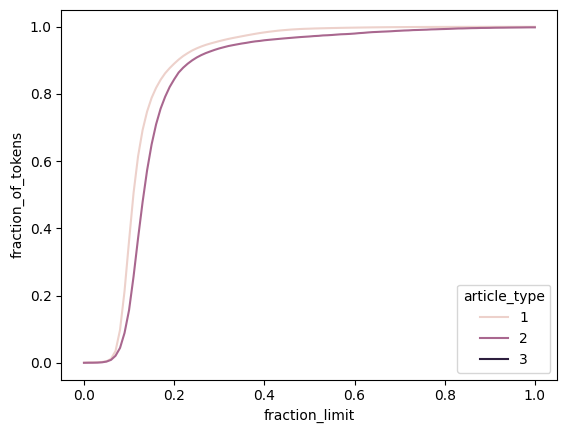

In [36]:
sns.lineplot(data = result_df , y  =  'fraction_of_tokens', x = 'fraction_limit', hue = 'article_type')

In [32]:
result_df.loc[result_df['article_type']!=3].sort_values(['article_type', 'fraction_limit'])

,counts,fraction_limit,article_type,total_tokens_sum,fraction_of_articles,fraction_of_tokens
0,0,0.00,1,0,0.000000,0.000000
3,51325,0.05,1,1738277,0.095523,0.004654
6,205950,0.10,1,135557623,0.383301,0.362904
9,379517,0.15,1,294464994,0.706333,0.788318
12,433960,0.20,1,332437973,0.807659,0.889977
15,464376,0.25,1,349444939,0.864267,0.935506
18,484127,0.30,1,357523393,0.901027,0.957133
21,495263,0.35,1,362855022,0.921752,0.971407
24,503218,0.40,1,367181910,0.936558,0.982990
27,510495,0.45,1,369961714,0.950101,0.990432


# Load very long articles

This is to see what these really long articles are all about

In [8]:
directory = './data/ncse_text_chunks'
min_tokens = 5000
df_list = []

for filename in os.listdir(directory):

    file_path = os.path.join(directory, filename)

    df = pd.read_parquet(file_path)
    df = df.loc[(df['total_tokens']> min_tokens) & (df['article_type_id']==1),:]

    df_list.append(df)
    print(file_path)  # Or perform any file operation

long_articles_df = pd.concat(df_list, ignore_index=True).sort_values('total_tokens', ascending=False).reset_index(drop=True)

./data/ncse_text_chunks/ncse_base_1.parquet
./data/ncse_text_chunks/ncse_base_6.parquet
./data/ncse_text_chunks/ncse_base_0.parquet
./data/ncse_text_chunks/ncse_base_5.parquet
./data/ncse_text_chunks/ncse_base_2.parquet
./data/ncse_text_chunks/ncse_base_4.parquet
./data/ncse_text_chunks/ncse_base_3.parquet


In [9]:
long_articles_df#.sort_values('symbol_fract').loc[572,'content_html']

,id,aid,slug,position_in_page,title,description,content_html,article_type_id,continuation_from_id,continuation_to_id,issue_id,page_id,is_department,total_tokens,symbol_count,symbol_fract,issue_date,publication_id
0,706728,Ar00300,ar00300,35.0,E' Al-S RATION. sii^ar. to. am> i:>*^* t...,,": - J s . . , _- _nir-af-duT-:- of _> a a-, ic...",1,706729.0,NaN,3989,136514,False,29344,11990,0.408601,1843-06-03,27
1,705137,Ar00700,ar00700,NaN,Untitled Article,,"EMIGRATION . ] TfK ERE TO , A >~ D HOW TO PROC...",1,NaN,NaN,3976,136414,False,16380,4968,0.303297,1843-05-27,27
2,943814,Ar00807,ar00807,NaN,Untitled Article,,IMPERIAL PARLIAMENT . —Tuesbay . ( Continued f...,1,NaN,NaN,5605,169135,False,14320,2506,0.175000,1842-05-07,27
3,912059,Ar00703,ar00703,131.0,GERMANY. PRUSSIA. PKOCLAHiTISH TO ill PC...,,GERMANY . PRUSSIA . _PKOCLAHiTISH TO ill _PCOF...,1,NaN,912060.0,5373,167278,False,13223,1533,0.115934,1848-04-01,27
4,914436,Ar00603,ar00603,117.0,*R*£om da we dab tho gensJcmaa ! The kna...,,* R _* £ om da we dab tho _gensJcmaa ! The kna...,1,NaN,NaN,5390,167413,False,12527,2052,0.163806,1848-05-20,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,788990,Ar02100,ar02100,NaN,Untitled Article,,CO Colour Colonial bb -Sergeant Office List ' ...,1,788988.0,788992.0,4409,158208,False,5008,1897,0.378794,1883-12-31,26
960,788241,Ar12800,ar12800,NaN,Untitled Article,,"- ¦ ¦ - . . 4 12 * WH- ' WO ItfDEX : WO ^ KO"" ...",1,788240.0,NaN,4405,157703,False,5007,1023,0.204314,1889-12-31,26
961,788805,Ar01700,ar01700,NaN,Untitled Article,,1890 } T ^ 3 B 1 «^ mCfflr ~ CIi — Child - — '...,1,788804.0,788806.0,4408,158071,False,5007,1586,0.316757,1890-12-31,26
962,560145,Ar00300,ar00300,NaN,Untitled Article,,WAR TO THE MINISTRY . The demonstration at She...,1,NaN,560148.0,3267,104565,False,5001,491,0.098180,1854-09-30,20


In [2]:
directory = './data/ncse_text_chunks'
min_tokens = 2000
df_list = []

for filename in os.listdir(directory):

    file_path = os.path.join(directory, filename)

    df = pd.read_parquet(file_path)
    df = df.loc[(df['total_tokens']> min_tokens) & (df['article_type_id']==2),:]

    df_list.append(df)
    print(file_path)  # Or perform any file operation

long_adverts_df = pd.concat(df_list, ignore_index=True).sort_values('total_tokens', ascending=False).reset_index(drop=True)

./data/ncse_text_chunks/ncse_base_1.parquet
./data/ncse_text_chunks/ncse_base_6.parquet
./data/ncse_text_chunks/ncse_base_0.parquet
./data/ncse_text_chunks/ncse_base_5.parquet
./data/ncse_text_chunks/ncse_base_2.parquet
./data/ncse_text_chunks/ncse_base_4.parquet
./data/ncse_text_chunks/ncse_base_3.parquet


In [33]:
pattern = r'[:;"\-_\+\*\^\|¦\'!,\\/»\]\[\.]'  
#pattern = r'[_]' 

# Count occurrences of the pattern in each row of 'content_html'
long_adverts_df['symbol_count'] = long_adverts_df['content_html'].str.count(pattern)
long_adverts_df['symbol_fract'] = long_adverts_df['symbol_count']/long_adverts_df['total_tokens']


In [35]:
long_adverts_df.sort_values('symbol_fract', ascending=True)

,id,aid,slug,position_in_page,title,description,content_html,bounding_box,title_image,article_type_id,continuation_from_id,continuation_to_id,issue_id,page_id,is_department,total_tokens,symbol_count,symbol_fract
128,1037576,Ad00612,ad00612,NaN,Untitled Ad,,IN the Prospectus which tbe NORTH AMERICAN LAN...,"{'x0': '545', 'x1': '1023', 'y0': '554', 'y1':...",periodicals/101-NSS-1844-07-20-PG001/Ad00612S.png,2,NaN,NaN,6303,174717,False,3123,389,0.124560
141,1032248,Ad00610,ad00610,NaN,Untitled Ad,,IN the Prospectus which tbe NORTH AMERICAN LAN...,"{'x0': '554', 'x1': '1032', 'y0': '137', 'y1':...",periodicals/101-NSS-1844-08-31-PG001/Ad00610S.png,2,NaN,NaN,6263,174397,False,3085,398,0.129011
119,1037766,Ad00207,ad00207,NaN,Untitled Ad,,IN the Prospectus -which the NORTH AMERICAN LA...,"{'x0': '331', 'x1': '813', 'y0': '618', 'y1': ...",periodicals/101-NSS-1844-11-23-PG001/Ad00207S.png,2,NaN,NaN,6305,174729,False,3152,411,0.130393
449,765303,Ad14601,ad14601,413.0,,,"Demy 8 vo . cloth extra , price 16 s . AN ARCT...","{'x0': '88', 'x1': '914', 'y0': '148', 'y1': '...",periodicals/099-TEC-1886-10-01-001-SINGLE/Ad14...,2,NaN,NaN,4316,150711,False,2388,313,0.131072
808,1055048,Ad00820,ad00820,NaN,Untitled Ad,,"TO THE CHARTISTS OF THE UNITED QUEENDOM . "" Wh...","{'x0': '545', 'x1': '775', 'y0': '487', 'y1': ...",periodicals/101-NSS-1841-05-29-PG001/Ad00820S.png,2,NaN,NaN,6433,175887,False,2181,287,0.131591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,780315,Ad19801,ad19801,514.0,,,SERIAL ISSUE OF YRTARTE'S 'FLORENCE : FLORENCE...,"{'x0': '98', 'x1': '924', 'y0': '131', 'y1': '...",periodicals/099-TEC-1883-12-06-001-SINGLE/Ad19...,2,NaN,NaN,4377,155170,False,2870,2750,0.958188
407,768725,Ad17900,ad17900,479.0,,,"Wp ^ K - ^^ * , . ""''' __ lll ' ** jJBBpFffP ^...","{'x0': '35', 'x1': '882', 'y0': '61', 'y1': '1...",periodicals/099-TEC-1886-12-06-001-SINGLE/Ad17...,2,NaN,768728.0,4328,151623,False,2444,2396,0.980360
1155,739835,Ad23801,ad23801,664.0,,,First Part of New Volume will be ready Decembe...,"{'x0': '66', 'x1': '875', 'y0': '117', 'y1': '...",periodicals/099-TEC-1888-12-06-001-SINGLE/Ad23...,2,NaN,NaN,4208,142808,False,2024,2020,0.998024
650,757080,Ad33301,ad33301,848.0,,,"l lBGa - ntifqV ^ V ^ - "" ' &^^ Uiiiq ^ - qe t...","{'x0': '46', 'x1': '946', 'y0': '136', 'y1': '...",periodicals/099-TEC-1889-12-06-001-SINGLE/Ad33...,2,NaN,NaN,4280,148169,False,2254,2304,1.022183


<Axes: xlabel='total_tokens', ylabel='symbol_fract'>

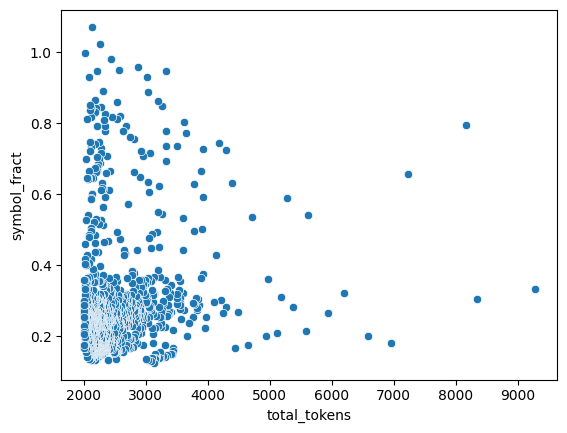

In [36]:
sns.scatterplot(data = long_adverts_df, x = 'total_tokens', y = 'symbol_fract')

In [55]:
long_adverts_df#.at[1196, 'content_html']

NameError: name 'long_adverts_df' is not defined

In [52]:
2/21

0.09523809523809523